In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # or '3' to suppress all INFO and WARNING messages
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pandas_profiling
import seaborn as sns
import datetime as dt

In [4]:
# Set the default plot size
plt.rcParams['figure.figsize'] = [15, 8]
# set a grid for each plot too
sns.set_style("whitegrid")

In [5]:
path="/Users/ud/Downloads/solar_weather[1].csv"
df=pd.read_csv(path)

In [6]:
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [7]:
df.describe(include='all')

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
unique,196776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,NaN,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,NaN,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,NaN,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,NaN,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

In [9]:
#Change dataframe index to datetime
df.index = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')
df = df.drop('Time', axis='columns')

In [10]:
#converting time data to time signal
df['timestamp'] = df.index.map(pd.Timestamp.timestamp)
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,timestamp
Time,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483229e+09
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483230e+09
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483231e+09
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483232e+09
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1,1.483232e+09


In [11]:
day = 60 * 60 * 24  # Number of seconds in a day
year = 365.2425 * day  # Number of seconds in a year (considering leap years)

# Create new columns for sine and cosine transformations of time-related features
df['day sin'] = np.sin(df['timestamp'] * (2 * np.pi/day))
df['day cos'] = np.cos(df['timestamp'] * (2 * np.pi/day))
df['year sin'] = np.sin(df['timestamp'] * (2 * np.pi/year))
df['year cos'] = np.cos(df['timestamp'] * (2 * np.pi/year))


In [12]:
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,...,dayLength,SunlightTime/daylength,weather_type,hour,month,timestamp,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483229e+09,2.504006e-13,1.000000,0.010364,0.999946
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483230e+09,6.540313e-02,0.997859,0.010544,0.999944
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483231e+09,1.305262e-01,0.991445,0.010723,0.999943
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483232e+09,1.950903e-01,0.980785,0.010902,0.999941
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,...,450,0.0,4,1,1,1.483232e+09,2.588190e-01,0.965926,0.011081,0.999939


In [44]:
df = df.drop(['timestamp', 'hour', 'month'], axis='columns')
df.iloc[50 : 55]

KeyError: "['timestamp', 'hour', 'month'] not found in axis"

In [14]:
# Any nulls - no
df.isna().sum()

Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
day sin                   0
day cos                   0
year sin                  0
year cos                  0
dtype: int64

In [15]:
df.index.min(),df.index.max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2022-08-31 17:45:00'))

In [16]:
# Split the dataset into features (X) and target (y)
X = df.drop('Energy delta[Wh]', axis=1)  # Assuming 'Energy delta[Wh]' is the target variable
y = df['Energy delta[Wh]']

In [17]:
# Normalize each column of X to the range [0, 1]
min_vals = X.min()
max_vals = X.max()
X= (X - min_vals) / (max_vals - min_vals)

In [18]:
X.head()

,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.0,0.347328,0.628571,1.0,0.342657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75,0.500000,1.000000,0.505182,0.999973
2017-01-01 00:15:00,0.0,0.347328,0.628571,1.0,0.342657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75,0.532702,0.998929,0.505272,0.999972
2017-01-01 00:30:00,0.0,0.347328,0.628571,1.0,0.342657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75,0.565263,0.995722,0.505361,0.999971
2017-01-01 00:45:00,0.0,0.347328,0.628571,1.0,0.342657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75,0.597545,0.990393,0.505451,0.999970
2017-01-01 01:00:00,0.0,0.349237,0.614286,1.0,0.363636,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75,0.629410,0.982963,0.505541,0.999969


In [19]:
y.head()

Time
2017-01-01 00:00:00    0
2017-01-01 00:15:00    0
2017-01-01 00:30:00    0
2017-01-01 00:45:00    0
2017-01-01 01:00:00    0
Name: Energy delta[Wh], dtype: int64

In [20]:
X_validation, _, y_validation, _ = train_test_split(X, y, test_size=0.9, shuffle=False)

In [21]:
# Specify the date for splitting
split_date = '2022-01-01'

# Split the datasets based on the date
X_train = X[X.index < split_date]
y_train = y[y.index < split_date]

X_test = X[X.index >= split_date]
y_test = y[y.index >= split_date]

In [22]:
X_train.head()

,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.0,0.347328,0.628571,1.0,0.342657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75,0.500000,1.000000,0.505182,0.999973
2017-01-01 00:15:00,0.0,0.347328,0.628571,1.0,0.342657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75,0.532702,0.998929,0.505272,0.999972
2017-01-01 00:30:00,0.0,0.347328,0.628571,1.0,0.342657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75,0.565263,0.995722,0.505361,0.999971
2017-01-01 00:45:00,0.0,0.347328,0.628571,1.0,0.342657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75,0.597545,0.990393,0.505451,0.999970
2017-01-01 01:00:00,0.0,0.349237,0.614286,1.0,0.363636,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75,0.629410,0.982963,0.505541,0.999969


In [23]:
y_train.head()

Time
2017-01-01 00:00:00    0
2017-01-01 00:15:00    0
2017-01-01 00:30:00    0
2017-01-01 00:45:00    0
2017-01-01 01:00:00    0
Name: Energy delta[Wh], dtype: int64

In [24]:
X_test.head()

,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.0,0.5,0.528571,0.961538,0.356643,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75,0.500000,1.000000,0.503355,0.999989
2022-01-01 00:15:00,0.0,0.5,0.528571,0.961538,0.356643,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75,0.532702,0.998929,0.503444,0.999988
2022-01-01 00:30:00,0.0,0.5,0.528571,0.961538,0.356643,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75,0.565263,0.995722,0.503534,0.999988
2022-01-01 00:45:00,0.0,0.5,0.528571,0.961538,0.356643,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75,0.597545,0.990393,0.503623,0.999987
2022-01-01 01:00:00,0.0,0.5,0.528571,0.948718,0.328671,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75,0.629410,0.982963,0.503713,0.999986


In [25]:
y_test.head()

Time
2022-01-01 00:00:00    0
2022-01-01 00:15:00    0
2022-01-01 00:30:00    0
2022-01-01 00:45:00    0
2022-01-01 01:00:00    0
Name: Energy delta[Wh], dtype: int64

In [26]:
X_validation.shape

(19677, 17)

In [27]:
X_train.shape

(174048, 17)

In [28]:
X_test.shape

(22728, 17)

In [29]:
# Best hidden layer size found during hyperparameter search
best_hidden_size = 4
# Create a TensorFlow model with the best hidden layer size
model = tf.keras.Sequential([
    tf.keras.layers.Dense(best_hidden_size, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='linear')  # Assuming a single output
])

In [30]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the best model weights
)


# Train the ANN
model.fit(X_train, y_train,validation_data=(X_validation, y_validation), epochs=100, verbose=1, callbacks=[early_stopping])

Epoch 1/100
5439/5439 [==============================] - 30s 5ms/step - loss: 1216429.7500 - mse: 1216429.7500 - mae: 550.7226 - val_loss: 1122925.7500 - val_mse: 1122925.7500 - val_mae: 586.0073
Epoch 2/100
5439/5439 [==============================] - 30s 6ms/step - loss: 847995.0000 - mse: 847995.0000 - mae: 537.1566 - val_loss: 792207.4375 - val_mse: 792207.4375 - val_mae: 549.1447
Epoch 3/100
5439/5439 [==============================] - 29s 5ms/step - loss: 624002.6250 - mse: 624002.6250 - mae: 479.3450 - val_loss: 625471.6250 - val_mse: 625471.6250 - val_mae: 503.1238
Epoch 4/100
5439/5439 [==============================] - 29s 5ms/step - loss: 516119.2500 - mse: 516119.2500 - mae: 477.6497 - val_loss: 536963.9375 - val_mse: 536963.9375 - val_mae: 500.8014
Epoch 5/100
5439/5439 [==============================] - 29s 5ms/step - loss: 451285.5312 - mse: 451285.5312 - mae: 472.1717 - val_loss: 468978.6250 - val_mse: 468978.6250 - val_mae: 480.8262
Epoch 6/100
5439/5439 [=============

In [31]:
# Validate the ANN on the validation data
y_validation_predict = model.predict(X_validation)

# Test the ANN on the testing data
y_test_predict = model.predict(X_test)

# Calculate RMSE for evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
validation_rmse = np.sqrt(mean_squared_error(y_validation, y_validation_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Validation RMSE: {validation_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

5439/5439 [==============================] - 10s 2ms/step
Train RMSE: 387.6596
Validation RMSE: 415.4427
Test RMSE: 480.1950


In [32]:
test_predictions = model.predict(X_test)
val_predictions = model.predict(X_validation)
train_predictions = model.predict(X_train)

5439/5439 [==============================] - 10s 2ms/step


In [33]:
import numpy as np

# Set predicted negative values to zero
test_predictions[test_predictions < 0] = 0
val_predictions[val_predictions < 0] = 0
train_predictions[train_predictions < 0] = 0

In [34]:
for value in test_predictions[50:55]:
    print(value)

[727.1616]
[774.38574]
[584.2903]
[378.6371]
[357.50134]


In [35]:
for value in y_test[50:55]:
    print(value)

96
34
51
43
57


In [37]:
import pandas as pd

# Create a DataFrame with y_test and test_predictions
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions.flatten()})

# Assuming comparison_df is your DataFrame
print(comparison_df.iloc[10000:10051])  # Adjust the number inside head() to display more or fewer rows

                     Actual    Predicted
Time                                    
2022-04-21 04:00:00      25     0.000000
2022-04-21 04:15:00      51    76.164429
2022-04-21 04:30:00      88    17.891479
2022-04-21 04:45:00     145     0.000000
2022-04-21 05:00:00     146   241.998169
2022-04-21 05:15:00     239   454.379272
2022-04-21 05:30:00     379   295.423706
2022-04-21 05:45:00     421   117.052612
2022-04-21 06:00:00     551   184.435425
2022-04-21 06:15:00     743   367.461304
2022-04-21 06:30:00     641   563.892090
2022-04-21 06:45:00     659   623.786255
2022-04-21 07:00:00     628   598.110474
2022-04-21 07:15:00     897   768.912231
2022-04-21 07:30:00    1121   823.496948
2022-04-21 07:45:00    1020   915.521973
2022-04-21 08:00:00    1277  1241.407837
2022-04-21 08:15:00    1264  1421.026733
2022-04-21 08:30:00    1274  1429.207275
2022-04-21 08:45:00    2828  2004.746338
2022-04-21 09:00:00    2530  2368.005371
2022-04-21 09:15:00    2039  2165.655762
2022-04-21 09:30

In [38]:
y_test.head()

Time
2022-01-01 00:00:00    0
2022-01-01 00:15:00    0
2022-01-01 00:30:00    0
2022-01-01 00:45:00    0
2022-01-01 01:00:00    0
Name: Energy delta[Wh], dtype: int64

In [39]:
from sklearn.metrics import r2_score
# Print the accuracy
r_squared = r2_score(y_test, test_predictions)
print ("test data accuracy")
print(f'R-squared (R²): {r_squared:.4f}')

r_squared = r2_score(y_validation, val_predictions)
print ("validation data accuracy")
print(f'R-squared (R²): {r_squared:.4f}')

r_squared = r2_score(y_train, train_predictions)
print ("train data accuracy")
print(f'R-squared (R²): {r_squared:.4f}')

test data accuracy
R-squared (R²): 0.8244
validation data accuracy
R-squared (R²): 0.8569
train data accuracy
R-squared (R²): 0.8628


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
def plotPredictions(X, y, start=0, end=200):
    predictions = model.predict(X)
    predictions[predictions < 0] = 0
    predictions = np.hstack(predictions)
    predictions_df = pd.DataFrame(predictions, columns=["Predicted Values"])
    predictions_df.index = y.index
    plt.plot(y[start:end], label='Actual')
    plt.plot(predictions_df[start:end], label='Predicted')
    plt.legend()
    print(f'MSE {mean_squared_error(y, predictions):.2f}')
    print(f'MAE {mean_absolute_error(y, predictions):.2f}')
    spearman_stats = spearmanr(y, predictions)
    print(spearman_stats)


711/711 [==============================] - 1s 2ms/step
MSE 225086.68
MAE 249.78
SignificanceResult(statistic=0.8562527752702328, pvalue=0.0)


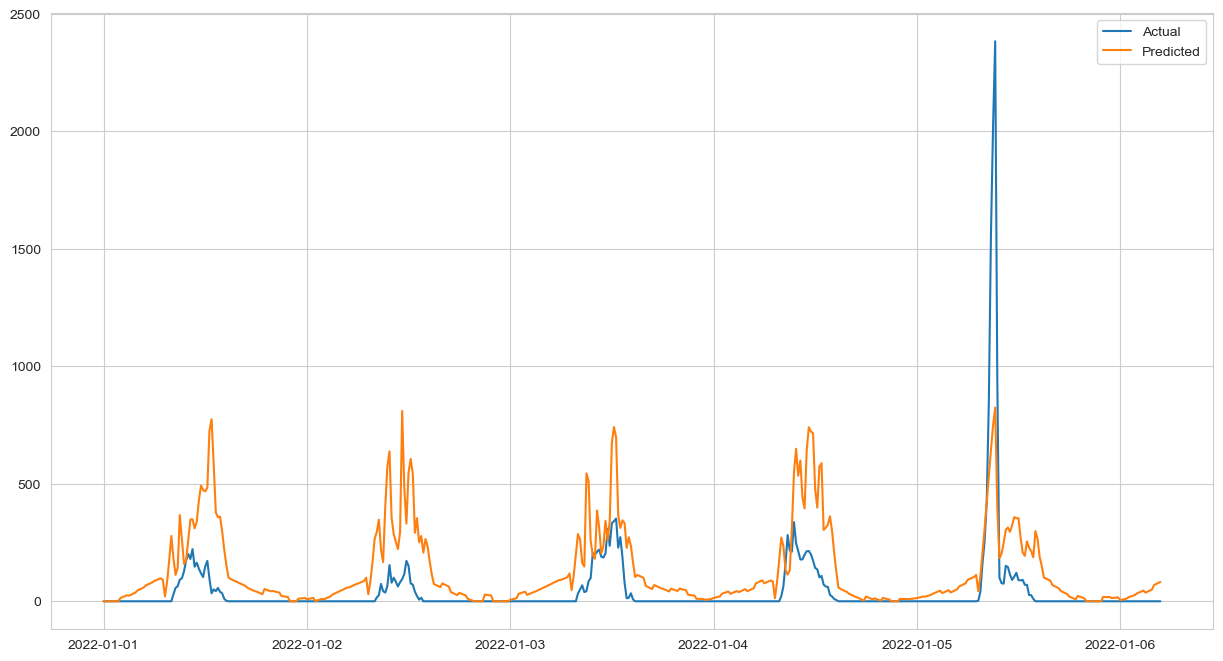

In [42]:
plt.figure(figsize=(15,8))
plotPredictions(X_test, y_test, start=0, end=500)

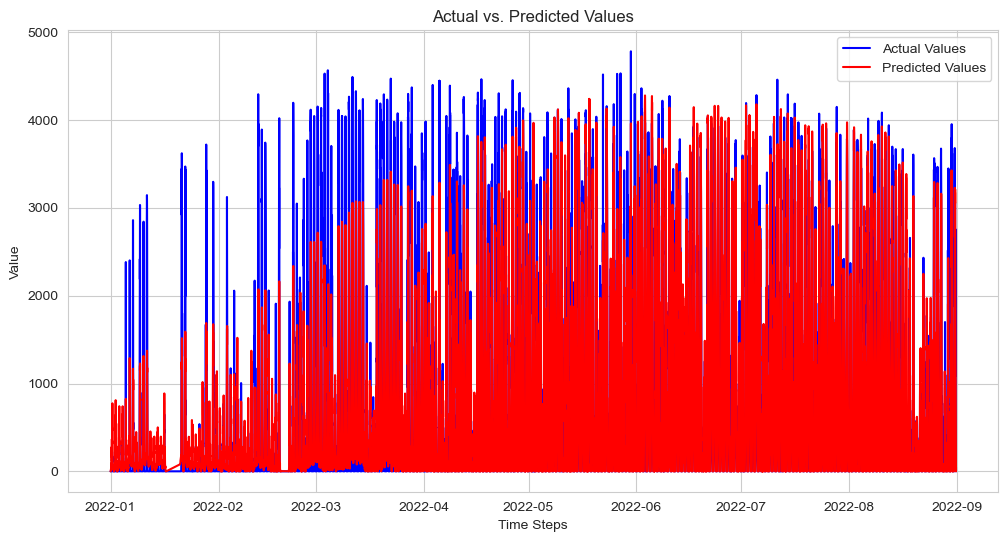

In [43]:
import matplotlib.pyplot as plt

# Plot the actual values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
test_predictions_df = pd.DataFrame(test_predictions, columns=["Predicted Values"])
test_predictions_df.index = y_test.index
plt.plot(test_predictions_df, label='Predicted Values', color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()